(stability-and-stiffness)=
# 8.4. Stability and Stiffness of Numerical Methods

You have probably heared about **stability**, it has likely been regarding the stability of a *system*. Stable systems are those with well-behaved exact solutions, meaning they do not grow unbounded.
In engineering we mostly focus (or want!) stable systems, although there are some interesting unstable systems such as those involving resonance, nonlinear dynamics, or chaos—generally we want to know when that happens so we can prevent it.

We can also define the stability of a *numerical scheme*, which is when the numerical solution exhibits unphysical behavior. In other words, it blows up.

For example, let's consider the relatively simple 1st-order ODE

$$
\frac{dy}{dt} = -3 y
$$

with the initial condition $y(0) = 1$. As we will see, this ODE can cause explicit numerical schemes to become unstable, and thus it is a **stiff** ODE. (Note that we can easily obtain the exact solution for this problem, which is $y(t) = e^{-3 t}$.)

Let's try solving this with the Forward Euler method, integrating over $0 \leq t \leq 20$, for a range of time-step size values: $\Delta t = 0.1, 0.25, 0.5, 0.75$. 

### Task: Implement a general Forward Euler solver and plot the results for the different step sizes.

In [1]:
import Pkg
Pkg.instantiate()
using Plots

In [11]:
# dydt to integrate usind dydt = f(t, y) = -3 * y
f(t, y) = -3 * y

# we'll create a simple function to do forward Euler
function forward_euler(t_end, y0, dt, f)
    # Simple function to perform Forward Euler iteration
    time = 0:dt:t_end
    y = zeros(length(time))
    y[1] = y0
    for idx in 1:length(time)-1
        y[idx+1] = y[idx] + f(time[idx], y[idx]) * dt
    end
    return time, y
end

forward_euler (generic function with 1 method)

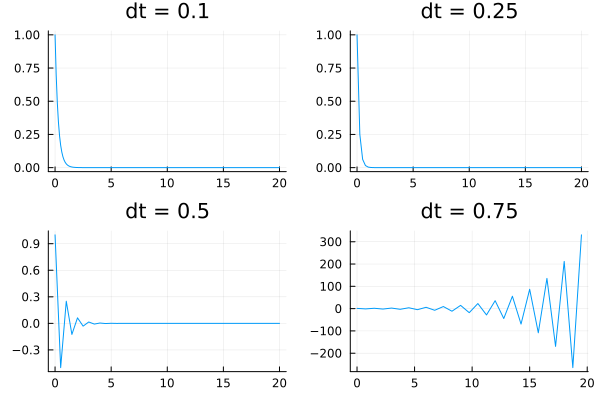

In [12]:
# initial condition
y0 = 1
t_end = 20

dt = 0.1
time, y = forward_euler(t_end, y0, dt, f)
p1 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.25
time, y = forward_euler(t_end, y0, dt, f)
p2 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.5
time, y = forward_euler(t_end, y0, dt, f)
p3 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.75
time, y = forward_euler(t_end, y0, dt, f)
p4 = plot(time, y, grid=true, title="dt = $dt")

plot(p1, p2, p3, p4, layout=(2, 2), legend=false)

At the smaller step sizes, $\Delta t = 0.1$ and $\Delta t = 0.25$, we see that the solution is well-behaved. But, when we increase $\Delta t$ to 0.5, we see some instability that goes away with time. Then, when we increase $\Delta t$ to 0.75, the solution eventually blows up, leading to error **much** larger than what we should expect based on the method's order of accuracy (first) and the step size value.

Compare this behavior to that for the ODE

$$
\frac{dy}{dt} = e^{-t}
$$

which is **non-stiff**:

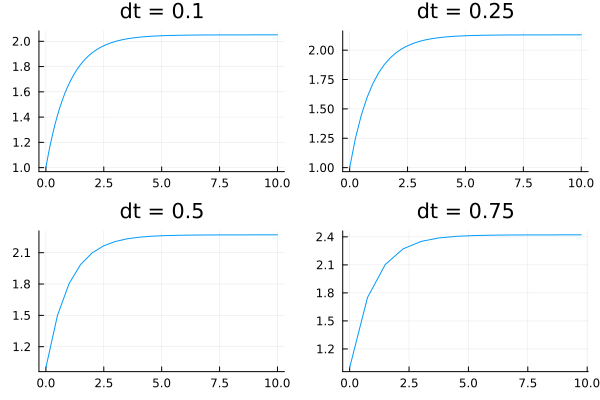

In [10]:
# dydt to integrate
f(t, y) = exp(-t)

# initial condition
y0 = 1
t_end = 10

dt = 0.1
time, y = forward_euler(t_end, y0, dt, f)
p1 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.25
time, y = forward_euler(t_end, y0, dt, f)
p2 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.5
time, y = forward_euler(t_end, y0, dt, f)
p3 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.75
time, y = forward_euler(t_end, y0, dt, f)
p4 = plot(time, y, grid=true, title="dt = $dt")

plot(p1, p2, p3, p4, layout=(2, 2), legend=false)

In this case, we see that the solution remains well-behaved even for larger time-step sizes, and the error matches the expected order based on the method and step-size value.

In general numerical schemes can be:

- **unstable**: the scheme blows up for any choice of parameters
- **conditionally stable**: the scheme is stable for a particular choice of parameters (for example, $\Delta t$ is less than some threshold)
- **unconditionally stable**: the scheme is always stable

Schemes may be stable for some problem/system and not for another, and vice versa.

Stability is related to robustness of a method, which is generally a tradeoff between complexity and computational cost. The choice of method and solution strategy depends on what you want, and how long you can wait for it. In general, we almost always want to use the largest $\Delta t$ allowable. Instead of decreasing the stepsize to avoid stability issues we can also use uncodiontionally stable methods. An example for this is the Backward Euler method which is an implicit Method. In contrast to the Forward Euler method (explicit method), the Backward Euler method is unconditionally stable, but it is also first-order accurate (like the Forward Euler method - you will see higher order methods further down).

In the next lecture we will have a more in depth discussion of stability and stiffness. The detailed derivation of higher order methods will also be covered in the next lecture. For now let's look at the backward Euler method.

## Backward Euler method

The Backward Euler method is very similar to the Forward Euler method, except in one way: it uses the slope at the *next* time step: 

$$
    \left(\frac{dx}{dt}\right)_{i+1} \approx \frac{x_{i+1} - x_i}{\Delta t}
$$

Then, the resulting recursion formula is

$$
x_{i+1} = x_i + \Delta t \left(\frac{dx}{dt}\right)_{i+1}, \text{or } \\
x_{i+1} = x_i + \Delta t \, f(t_{i+1}, x_{i+1})
$$

where $f(t,x) = dx/dt$.

Notice that this recursion formula cannot be directly solved, because $x_{i+1}$ shows up on both sides. This is an **implicit** method, where all the other methods we will cover (Forward Euler, Heun's, and 4th-order Runge-Kutta) are **explicit**. Implicit methods require more work to actually implement and are often more computationally expensive, but they are more stable and can be used with larger time steps.

### Backward Euler example
For example, let's again consider the relatively simple 1st-order ODE from above

$$
\frac{dy}{dt} = f(t,y) = -3 y
$$

To actually solve this problem with the Backward Euler method, we need to incorporate the derivative function $f(x,y)$ into the recursion formula and solve for $y_{i+1}$:

$$
\begin{align}
y_{i+1} &= y_i + \Delta t \, f(t_{i+1}, y_{i+1}) \\
y_{i+1} &= y_i + \Delta t \, [-3 y_{i+1}] \\
y_{i+1} (1 + 3 \Delta t) &= y_i \\
y_{i+1} &= \frac{y_i}{1 + 3 \Delta t}
\end{align}
$$

Now we have a useable recursion formula that we can use to solve this problem. Let's use the initial condition $y(0) = 1$. Let's try solving this with the Forward Euler method, integrating over $0 \leq t \leq 10$, for a range of time-step size values: $\Delta t = 0.1, 0.25, 0.5, 0.75$. 

### Task : Implement the Backward Euler method

In [11]:
# dydt to integrate
f(t, y) = -3 * y

# we'll create a simple function to do backward Euler
function backward_euler(t_end, y0, dt)
    # Simple function to perform backwar Euler iteration for dy/dt = f(t, y) = -3y
    # y_{i+1} &= \frac{y_i}{1 + 3 \Delta t}
    time = 0:dt:t_end
    y = zeros(length(time))
    y[1] = y0
    for idx in 1:length(time)-1
        t = time[idx]
        y[idx+1] = y[idx] / (1 + 3 * dt) # TODO: fill in the backward Euler iteration for y[idx+1] from the equation above 
    end
    return time, y
end

backward_euler (generic function with 1 method)

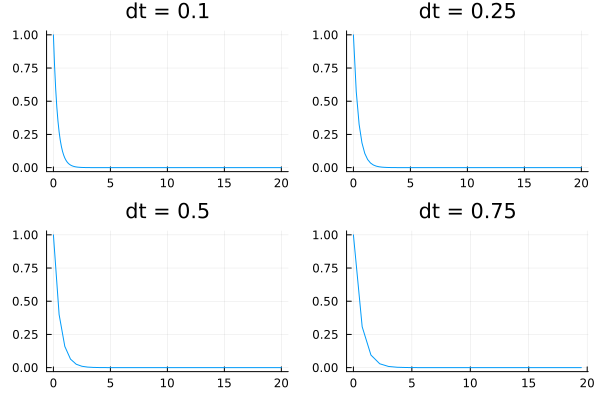

In [12]:
# initial condition
y0 = 1
t_end = 20

dt = 0.1
time, y = backward_euler(t_end, y0, dt)
p1 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.25
time, y = backward_euler(t_end, y0, dt)
p2 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.5
time, y = backward_euler(t_end, y0, dt)
p3 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.75
time, y = backward_euler(t_end, y0, dt)
p4 = plot(time, y, grid=true, title="dt = $dt")

plot(p1, p2, p3, p4, layout=(2, 2), legend=false)
